## Step 1: Load the Dataset

In [20]:
import pandas as pd

# Load the dataset
df = pd.read_csv('fifa21_raw_data.csv', low_memory=False)
df

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,High,Medium,5 ★,91,85,86,94,36,59,\n273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,https://cdn.sofifa.com/players/257/710/21_60.png,Mengxuan Zhang,http://sofifa.com/player/257710/mengxuan-zhang...,China PR,CB,Zhang Mengxuan,21,47,52,\n\n\n\nChongqing Dangdai Lifan FC SWM Team\n2...,...,Low,Low,1 ★,58,23,26,27,50,48,\n2
18975,https://cdn.sofifa.com/players/258/736/21_60.png,Vani Da Silva,http://sofifa.com/player/258736/vani-da-silva/...,England,ST,V. Da Silva,17,47,67,\n\n\n\nOldham Athletic\n2020 ~ 2021\n\n,...,Medium,Medium,1 ★,70,46,40,53,16,40,\n3
18976,https://cdn.sofifa.com/players/247/223/21_60.png,Ao Xia,http://sofifa.com/player/247223/ao-xia/210005/,China PR,CB,Xia Ao,21,47,55,\n\n\n\nWuhan Zall\n2018 ~ 2022\n\n,...,Medium,Medium,1 ★,64,28,26,38,48,51,\n3
18977,https://cdn.sofifa.com/players/258/760/21_60.png,Ben Hough,http://sofifa.com/player/258760/ben-hough/210005/,England,CM,B. Hough,17,47,67,\n\n\n\nOldham Athletic\n2020 ~ 2021\n\n,...,Medium,Medium,1 ★,64,40,48,49,35,45,\n5


## Step 2: Remove Unnecessary Newline Characters
The Team & Contract column and others contain newline characters (\n). We'll remove them.

In [21]:
# Remove newline characters from all columns
df = df.replace('\n', '', regex=True)

## Step 3: Convert Height and Weight Columns to Numerical Forms
The Height column is in feet and inches (e.g., 5'7"), and the Weight column is in pounds (e.g., 143lbs). We'll convert them to numerical values.



In [22]:
# Convert Height from feet/inches to centimeters
def convert_height(height):
    if isinstance(height, str):
        feet, inches = height.split("'")
        return int(feet) * 30.48 + int(inches.replace('"', '')) * 2.54
    return height

df['Height'] = df['Height'].apply(convert_height)

# Convert Weight from lbs to kilograms
def convert_weight(weight):
    if isinstance(weight, str):
        return float(weight.replace('lbs', '')) * 0.453592
    return weight

df['Weight'] = df['Weight'].apply(convert_weight)

## Step 4: Check Players Playing at a Club for More Than 10 Years
The Team & Contract column contains contract information. We'll extract the "Joined" year and calculate how long each player has been at the club.

In [23]:
# Extract the "Joined" year from the "Team & Contract" column
df['Joined'] = df['Team & Contract'].str.extract(r'(\d{4}) ~')[0]

# Convert 'Joined' to numeric
df['Joined'] = pd.to_numeric(df['Joined'], errors='coerce')

# Calculate years at the club
current_year = pd.Timestamp.now().year
df['Years_at_Club'] = current_year - df['Joined']

# Filter players with more than 10 years at the club
long_term_players = df[df['Years_at_Club'] > 10]
print(long_term_players[['Name', 'Team & Contract', 'Years_at_Club']])

                 Name               Team & Contract  Years_at_Club
0            L. Messi       FC Barcelona2004 ~ 2021           21.0
2            J. Oblak    Atlético Madrid2014 ~ 2023           11.0
5      R. Lewandowski  FC Bayern München2014 ~ 2023           11.0
11      M. ter Stegen       FC Barcelona2014 ~ 2022           11.0
12           Casemiro        Real Madrid2013 ~ 2023           12.0
...               ...                           ...            ...
18093     Cui Ming'an   Dalian YiFang FC2014 ~ 2022           11.0
18258     Song Zhiwei         Wuhan Zall2014 ~ 2020           11.0
18274       G. Harkin         Finn Harps2014 ~ 2020           11.0
18413      J. Stevens      Oxford United2014 ~ 2021           11.0
18430   B. Al Bahrani           Al Fateh2013 ~ 2022           12.0

[1008 rows x 3 columns]


## Step 5: Convert 'Value', 'Wage', and 'Release Clause' to Numbers
These columns are in string format with symbols like "€", "M" (million), and "K" (thousand). We'll clean and convert them to numerical values.

In [24]:
def convert_currency(value):
    if isinstance(value, str):
        if 'M' in value:
            return float(value.replace('€', '').replace('M', '')) * 1_000_000
        elif 'K' in value:
            return float(value.replace('€', '').replace('K', '')) * 1_000
        else:
            return float(value.replace('€', ''))
    return value

df['Value'] = df['Value'].apply(convert_currency)
df['Wage'] = df['Wage'].apply(convert_currency)
df['Release Clause'] = df['Release Clause'].apply(convert_currency)

## Step 6: Strip Star Characters from Columns
Columns like IR (International Reputation) contain star characters (★). We'll remove these and convert the columns to numerical values.

In [25]:
# Strip star characters and convert to numerical
def strip_stars(value):
    if isinstance(value, str):
        return int(value.replace('★', ''))
    return value

star_columns = ['IR']  # Add other columns if needed
for col in star_columns:
    df[col] = df[col].apply(strip_stars)

## Step 7: Identify Highly Valuable but Underpaid Players
We'll use a scatter plot to visualize the relationship between Value and Wage and identify players who are highly valuable but underpaid.

python

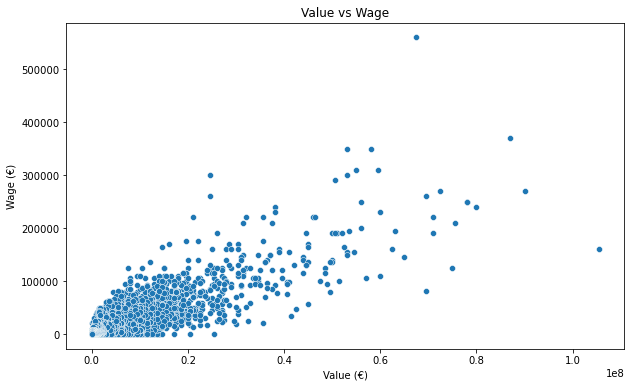

              Name       Value   Wage  Value_Wage_Ratio
156      Pau López  25500000.0  500.0           51000.0
378   V. Tsygankov  20500000.0  500.0           41000.0
548  L. Pellegrini  17000000.0  500.0           34000.0
379   D. Livaković  14500000.0  500.0           29000.0
336        Ismaily  14000000.0  500.0           28000.0
352         Taison  14000000.0  500.0           28000.0
353         Marlos  14000000.0  500.0           28000.0
622    J. Veretout  13500000.0  500.0           27000.0
201       E. Džeko  13500000.0  500.0           27000.0
464  H. Mkhitaryan  13000000.0  500.0           26000.0


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Value', y='Wage', data=df)
plt.title('Value vs Wage')
plt.xlabel('Value (€)')
plt.ylabel('Wage (€)')
plt.show()

# Identify underpaid players
df['Value_Wage_Ratio'] = df['Value'] / df['Wage']
underpaid_players = df.sort_values(by='Value_Wage_Ratio', ascending=False).head(10)
print(underpaid_players[['Name', 'Value', 'Wage', 'Value_Wage_Ratio']])